In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [2]:
small_psfs = glob.glob("M13_raw_images/psfccfbtf170075_*.fits")
trail_psfs = glob.glob("M13_raw_images/psfccfbte210072_*.fits")
distorted_psfs = glob.glob("M13_raw_images/psfccfbvc310078_*.fits")

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import sys

In [5]:
ticklabelsize = 17
axeslabelsize = 19
titlesize = 20

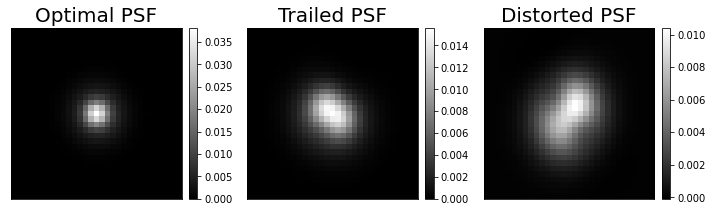

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharey='row', sharex=True)
from matplotlib.ticker import FuncFormatter
fmt = lambda x, pos: '{:.3f}'.format(x)
# cbar = plt.colorbar(format=FuncFormatter(fmt))

# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=100, hspace=None)
def clamp_less_than_zero_values(psf):
    psf[psf < 0.0] = sys.float_info.epsilon
    return psf

divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes('right', size='5%', pad=0.1)
mat1 = fits.getdata(small_psfs[0])

# coordinates = peak_local_max(mat1, threshold_abs=0)
show1 = ax[0].matshow(mat1, cmap='gray');
# ax[0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[0].xaxis.set_ticks_position("bottom")
ax[0].set_title("Optimal PSF", fontsize=titlesize)
c1 = fig.colorbar(show1, cax=cax1, format=FuncFormatter(fmt))
ax[0].tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax[0].tick_params(axis='both', which='minor', labelsize=ticklabelsize)
ax[0].set_xticks([]); ax[0].set_yticks([])

# coordinates = peak_local_max(mat1, threshold_abs=0)
divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes('right', size='5%', pad=0.1)
mat2 = fits.getdata(trail_psfs[0])
show2 = ax[1].matshow(mat2, cmap='gray');
# ax[1].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[1].xaxis.set_ticks_position("bottom")
ax[1].set_title("Trailed PSF", fontsize=titlesize)
c2 = fig.colorbar(show2, cax=cax2, format=FuncFormatter(fmt))
ax[1].tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax[1].tick_params(axis='both', which='minor', labelsize=ticklabelsize)
ax[1].set_xticks([]); ax[1].set_yticks([])

# coordinates = peak_local_max(mat1, threshold_abs=0)
divider = make_axes_locatable(ax[2])
cax3 = divider.append_axes('right', size='5%', pad=0.1)
mat3 = fits.getdata(distorted_psfs[0])
show3 = ax[2].matshow(mat3, cmap='gray');
# ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].xaxis.set_ticks_position("bottom")
ax[2].set_title("Distorted PSF", fontsize=titlesize)
c3 = fig.colorbar(show3, cax=cax3, format=FuncFormatter(fmt))
ax[2].tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax[2].tick_params(axis='both', which='minor', labelsize=ticklabelsize)
ax[2].set_xticks([]); ax[2].set_yticks([])

fig.tight_layout()

plt.savefig("psfMatShow.png", dpi=250, bbox_inches='tight')